### Question 1

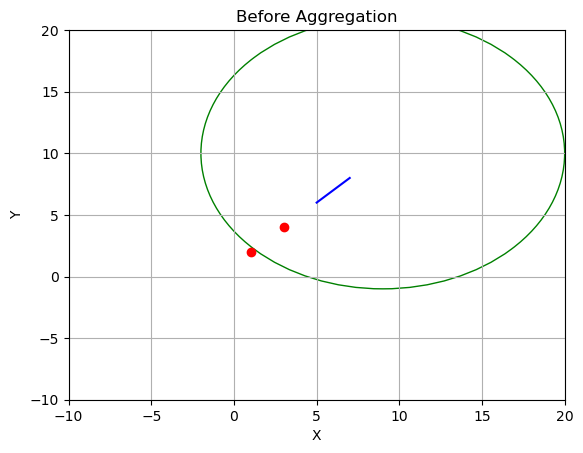

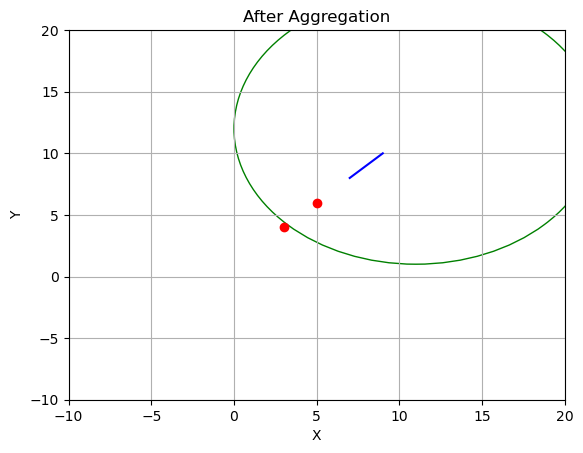

In [1]:
#Task #1. Simple figures
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def move(self, dx, dy):
        self.x += dx
        self.y += dy
    
    def rotate(self, angle):
        # Point remains unchanged during rotation
        pass


class Line:
    def __init__(self, start_point, end_point):
        self.start_point = start_point
        self.end_point = end_point
    
    def move(self, dx, dy):
        self.start_point.move(dx, dy)
        self.end_point.move(dx, dy)
    
    def rotate(self, angle):
        # Rotate start point
        self.start_point.rotate(angle)
        # Rotate end point
        self.end_point.rotate(angle)


class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    
    def move(self, dx, dy):
        self.center.move(dx, dy)
    
    def rotate(self, angle):
        # Circle remains unchanged during rotation
        pass


class Aggregation:
    def __init__(self, figures):
        self.figures = figures
    
    def move(self, dx, dy):
        for figure in self.figures:
            figure.move(dx, dy)
    
    def rotate(self, angle):
        for figure in self.figures:
            figure.rotate(angle)


# Create initial figures
point1 = Point(1, 2)
point2 = Point(3, 4)
line = Line(Point(5, 6), Point(7, 8))
circle = Circle(Point(9, 10), 11)

# Create a figure and axes for before aggregation
fig, ax = plt.subplots()

# Plot the figures before aggregation
plt.plot(point1.x, point1.y, 'ro')
plt.plot(point2.x, point2.y, 'ro')
plt.plot([line.start_point.x, line.end_point.x], [line.start_point.y, line.end_point.y], 'b-')
circle_plot = plt.Circle((circle.center.x, circle.center.y), circle.radius, edgecolor='g', facecolor='none')
ax.add_artist(circle_plot)

# Set plot limits for before aggregation
ax.set_xlim([-10, 20])
ax.set_ylim([-10, 20])

# Add labels and grid for before aggregation
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Display the plot for before aggregation
plt.title('Before Aggregation')
plt.show()

# Create an aggregation with the initial figures
aggregation = Aggregation([point1, point2, line, circle])

# Move all figures in aggregation
aggregation.move(2, 2)

# Rotate all figures in aggregation
aggregation.rotate(45)

# Create a figure and axes for after aggregation
fig, ax = plt.subplots()

# Plot the figures after aggregation
for figure in aggregation.figures:
    if isinstance(figure, Point):
        plt.plot(figure.x, figure.y, 'ro')
    elif isinstance(figure, Line):
        plt.plot([figure.start_point.x, figure.end_point.x], [figure.start_point.y, figure.end_point.y], 'b-')
    elif isinstance(figure, Circle):
        circle_plot = plt.Circle((figure.center.x, figure.center.y), figure.radius, edgecolor='g', facecolor='none')
        ax.add_artist(circle_plot)

# Set plot limits for after aggregation
ax.set_xlim([-10, 20])
ax.set_ylim([-10, 20])

# Add labels and grid for after aggregation
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

#Display plot after aggregation
plt.title('After Aggregation')
plt.show()


### Question 2

In [51]:
#Palindrome

In [2]:
#Tkinter Library to create simple GUI
import tkinter as tk
from tkinter import messagebox

def is_palindrome_with_trash_symbols(InputString, TrashSymbolsString):
    # Convert both strings to lowercase for case-insensitivity
    InputString = InputString.lower()
    TrashSymbolsString = TrashSymbolsString.lower()

    # Create a set of trash symbols for efficient lookup
    trash_symbols = set(TrashSymbolsString)

    # Create a new string with valid characters (excluding trash symbols)
    valid_string = ''.join(char for char in InputString if char not in trash_symbols)

    # Check if the valid string is a palindrome
    return valid_string == valid_string[::-1]

def check_palindrome():
    # Get the input string and trash symbols from the entry fields
    input_string = input_entry.get()
    trash_symbols = trash_entry.get()

    # Call the function to check if the input string is a palindrome
    result = is_palindrome_with_trash_symbols(input_string, trash_symbols)

    # Show the result in a message box
    if result:
        messagebox.showinfo("Palindrome Check", "Result: True. The input string is a palindrome.")
    else:
        messagebox.showinfo("Palindrome Check", "Result: False. The input string is not a palindrome.")

# Create the main window
window = tk.Tk()
window.title("Palindrome Checker")

# Create input labels and entry fields
input_label = tk.Label(window, text="Input String:")
input_label.pack()
input_entry = tk.Entry(window) # Entry field for input string
input_entry.pack()

trash_label = tk.Label(window, text="Trash Symbols:")
trash_label.pack()
trash_entry = tk.Entry(window) # Entry field for trash symbols
trash_entry.pack()

# Create the check button
check_button = tk.Button(window, text="Check", command=check_palindrome)
check_button.pack()

# Run the GUI main loop
window.mainloop()


## Question 3

In [3]:
#Question 3  Minefield
import tkinter as tk
import random
from tkinter import messagebox

def generate_minefield(n, m, bomb_probability):
    minefield = []
    for row in range(n):
        row_list = []
        for col in range(m):
            if (row == 4 and col == 4):
                row_list.append('.')
            elif random.random() < bomb_probability:
                row_list.append('B')
            else:
                row_list.append('.')
        minefield.append(row_list)
    return minefield

def find_safe_path(minefield):
    # Dimensions of the minefield
    rows = len(minefield)
    cols = len(minefield[0])

    # Visited array to keep track of visited cells
    visited = [[False for _ in range(cols)] for _ in range(rows)]

    # Helper function to check if a cell is within the minefield boundaries
    def is_valid(row, col):
        return 0 <= row < rows and 0 <= col < cols

    # Helper function to check if a cell is safe (no bomb)
    def is_safe(row, col):
        return minefield[row][col] != 'B'

    # Helper function to perform DFS
    def dfs(row, col, path):
        # Mark the current cell as visited
        visited[row][col] = True

        # Add the current cell to the path
        path.append((row, col))

        # Check if Totoshka reached the bottom-right cell (target)
        if row == rows - 1 and col == cols - 1:
            return True

        # Possible movements: right, down, left, up
        movements = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        # Explore all possible movements
        for dr, dc in movements:
            new_row = row + dr
            new_col = col + dc

            # Check if the new cell is valid and safe
            if is_valid(new_row, new_col) and not visited[new_row][new_col] and is_safe(new_row, new_col):
                # Recursively explore the new cell
                if dfs(new_row, new_col, path):
                    return True

        # Totoshka couldn't find a safe path, backtrack
        path.pop()
        return False

    # Start the DFS from the top-left cell (starting point)
    path = []
    if dfs(0, 0, path):
        return path

    # If no safe path is found, return None
    return None

def check_safe_path():
    n = 5  # Number of rows
    m = 5  # Number of columns
    bomb_probability = 0.2  # Probability of a field having a bomb

    minefield = generate_minefield(n, m, bomb_probability)

    # Update the minefield grid with correct and wrong symbols
    for row in range(len(minefield)):
        for col in range(len(minefield[row])):
            if minefield[row][col] == 'B':
                symbol = '❌'  # Wrong symbol
            else:
                symbol = '.'  # Correct symbol
            label = minefield_labels[row][col]
            label.configure(text=symbol)

    # Call the function to find a safe path
    safe_path = find_safe_path(minefield)

    # Show the safe path in a message box
    if safe_path:
        messagebox.showinfo("Safe Path", f"A safe path exists:\n{safe_path}")
    else:
        messagebox.showinfo("Safe Path", "No safe path found.")

# Create the main window
window = tk.Tk()
window.title("Minefield")
window.geometry("220x200")

# Generate the minefield
n = 5  # Number of rows
m = 5  # Number of columns
bomb_probability = 0.2  # Probability of a field having a bomb
minefield = generate_minefield(n, m, bomb_probability)

minefield_labels = []

for row in range(len(minefield)):
    label_row = []
    for col in range(len(minefield[row])):
        label = tk.Label(window, text=minefield[row][col], width=3, height=2, relief="solid")
        label.grid(row=row, column=col)
        label_row.append(label)
    minefield_labels.append(label_row)

# Create the dog label
dog_label = tk.Label(window, text="🐶", width=3, height=2, relief="solid")
dog_label.grid(row=0, column=0)

def move_dog():
    global dog_label  # Declare dog_label as a global variable

    # Get the current position of the dog
    current_row, current_col = 0, 0
    for row in range(len(minefield_labels)):
        for col in range(len(minefield_labels[row])):
            if minefield_labels[row][col] == dog_label:
                current_row, current_col = row, col
                break

    # Check if the dog can smell bombs in adjacent cells
    adjacent_bombs = []
    movements = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    for dr, dc in movements:
        new_row = current_row + dr
        new_col = current_col + dc
        if 0 <= new_row < len(minefield_labels) and 0 <= new_col < len(minefield_labels[new_row]):
            if minefield[new_row][new_col] == 'B':
                adjacent_bombs.append((new_row, new_col))

    # Move the dog to the next safe adjacent cell
    safe_moves = []
    for dr, dc in movements:
        new_row = current_row + dr
        new_col = current_col + dc
        if 0 <= new_row < len(minefield_labels) and 0 <= new_col < len(minefield_labels[new_row]):
            if (new_row, new_col) not in adjacent_bombs:
                safe_moves.append((new_row, new_col))

    if safe_moves:
        next_row, next_col = random.choice(safe_moves)
        # Update the minefield grid
        minefield_labels[current_row][current_col].configure(text='.')
        minefield_labels[next_row][next_col].configure(text='🐶')
        # Update the dog label reference
        dog_label = minefield_labels[next_row][next_col]

    # Highlight the cells [4,4]
    minefield_labels[4][4].configure(bg='red')

    # Check if the dog reached the target cell
    if current_row == len(minefield_labels) - 1 and current_col == len(minefield_labels[-1]) - 1:
        messagebox.showinfo("Success", "The dog reached the target!")
        return

    # Schedule the next move
    window.after(1000, move_dog)


# Schedule the first move of the dog
window.after(1000, move_dog)

# Create the check button
check_button = tk.Button(window, text="Check Safe Path", command=check_safe_path)
check_button.grid(row=len(minefield), columnspan=len(minefield[0]))

# Run the GUI main loop
window.mainloop()


In [4]:
#Question 3 (Girl Ally and Dog Totoshka)
import tkinter as tk
import random
from tkinter import messagebox

def generate_minefield(n, m, bomb_probability):
    minefield = []
    for row in range(n):
        row_list = []
        for col in range(m):
            if (row == 4 and col == 4):
                row_list.append('.')
            elif random.random() < bomb_probability:
                row_list.append('B')
            else:
                row_list.append('.')
        minefield.append(row_list)
    return minefield

def find_safe_path(minefield):
    # Dimensions of the minefield
    rows = len(minefield)
    cols = len(minefield[0])

    # Visited array to keep track of visited cells
    visited = [[False for _ in range(cols)] for _ in range(rows)]

    # Helper function to check if a cell is within the minefield boundaries
    def is_valid(row, col):
        return 0 <= row < rows and 0 <= col < cols

    # Helper function to check if a cell is safe (no bomb)
    def is_safe(row, col):
        return minefield[row][col] != 'B'

    # Helper function to perform DFS
    def dfs(row, col, path):
        # Mark the current cell as visited
        visited[row][col] = True

        # Add the current cell to the path
        path.append((row, col))

        # Check if Totoshka reached the bottom-right cell (target)
        if row == rows - 1 and col == cols - 1:
            return True

        # Possible movements: right, down, left, up
        movements = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        # Explore all possible movements
        for dr, dc in movements:
            new_row = row + dr
            new_col = col + dc

            # Check if the new cell is valid and safe
            if is_valid(new_row, new_col) and not visited[new_row][new_col] and is_safe(new_row, new_col):
                # Recursively explore the new cell
                if dfs(new_row, new_col, path):
                    return True

        # Totoshka couldn't find a safe path, backtrack
        path.pop()
        return False

    # Start the DFS from the top-left cell (starting point)
    path = []
    if dfs(0, 0, path):
        return path

    # If no safe path is found, return None
    return None

def check_safe_path():
    n = 5  # Number of rows
    m = 5  # Number of columns
    bomb_probability = 0.2  # Probability of a field having a bomb

    minefield = generate_minefield(n, m, bomb_probability)

    # Update the minefield grid with correct and wrong symbols
    for row in range(len(minefield)):
        for col in range(len(minefield[row])):
            if minefield[row][col] == 'B':
                symbol = '❌'  # Wrong symbol
            else:
                symbol = '.'  # Correct symbol
            label = minefield_labels[row][col]
            label.configure(text=symbol)

    # Call the function to find a safe path
    safe_path = find_safe_path(minefield)

    # Show the safe path in a message box
    if safe_path:
        messagebox.showinfo("Safe Path", f"A safe path exists:\n{safe_path}")
    else:
        messagebox.showinfo("Safe Path", "No safe path found.")

def create_girl_label(row, col):
    label = tk.Label(window, text="👧", width=3, height=2, relief="solid")
    label.grid(row=row, column=col)
    return label

# Create the main window
window = tk.Tk()
window.title("Minefield")
window.geometry("220x200")

# Generate the minefield
n = 5  # Number of rows
m = 5  # Number of columns
bomb_probability = 0.2  # Probability of a field having a bomb
minefield = generate_minefield(n, m, bomb_probability)

minefield_labels = []

for row in range(len(minefield)):
    label_row = []
    for col in range(len(minefield[row])):
        label = tk.Label(window, text=minefield[row][col], width=3, height=2, relief="solid")
        label.grid(row=row, column=col)
        label_row.append(label)
    minefield_labels.append(label_row)

# Create the dog label
dog_label = tk.Label(window, text="🐶", width=3, height=2, relief="solid")
dog_label.grid(row=0, column=0)

# Create the girl label
girl_label = create_girl_label(0, 0)

def move_dog():
    global dog_label, girl_label  # Declare dog_label and girl_label as global variables

    # Get the current position of the dog
    current_row, current_col = 0, 0
    for row in range(len(minefield_labels)):
        for col in range(len(minefield_labels[row])):
            if minefield_labels[row][col] == dog_label:
                current_row, current_col = row, col
                break

    # Get the current position of the girl
    girl_row, girl_col = 0, 0
    for row in range(len(minefield_labels)):
        for col in range(len(minefield_labels[row])):
            if minefield_labels[row][col] == girl_label:
                girl_row, girl_col = row, col
                break

    # Check if the dog can smell bombs in adjacent cells
    adjacent_bombs = []
    movements = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    for dr, dc in movements:
        new_row = current_row + dr
        new_col = current_col + dc
        if 0 <= new_row < len(minefield_labels) and 0 <= new_col < len(minefield_labels[new_row]):
            if minefield[new_row][new_col] == 'B':
                adjacent_bombs.append((new_row, new_col))

    # Move the dog to the next safe adjacent cell
    safe_moves = []
    for dr, dc in movements:
        new_row = current_row + dr
        new_col = current_col + dc
        if 0 <= new_row < len(minefield_labels) and 0 <= new_col < len(minefield_labels[new_row]):
            if (new_row, new_col) not in adjacent_bombs:
                safe_moves.append((new_row, new_col))

    if safe_moves:
        next_row, next_col = random.choice(safe_moves)
        # Update the minefield grid
        minefield_labels[current_row][current_col].configure(text='.')
        minefield_labels[next_row][next_col].configure(text='🐶')

        # Move the girl to the previous position of the dog
        minefield_labels[girl_row][girl_col].configure(text='.')
        minefield_labels[current_row][current_col].configure(text='👧')

        # Update the dog label reference
        dog_label = minefield_labels[next_row][next_col]
        # Update the girl label reference
        girl_label = minefield_labels[current_row][current_col]

    # Highlight the cells [4,4]
    minefield_labels[4][4].configure(bg='red')

    # Check if the dog reached the target cell
    if current_row == len(minefield_labels) - 1 and current_col == len(minefield_labels[-1]) - 1:
        messagebox.showinfo("Success", "The dog(Totoshka) and girl(Ally) reached the target!")
        return

    # Schedule the next move
    window.after(1000, move_dog)


# Schedule the first move of the dog
window.after(1000, move_dog)

# Create the check button
check_button = tk.Button(window, text="Check Safe Path", command=check_safe_path)
check_button.grid(row=len(minefield), columnspan=len(minefield[0]))

# Run the GUI main loop
window.mainloop()


## End